<h1>Installing required third-party packages</h1>

In [52]:
! pip install openpyxl
! pip install pandas
! pip install matplotlib

In [53]:
import openpyxl, matplotlib, os, pandas as pd

<h1>Calculate average for subject function</h1>

In [54]:
def calculateAverageForSubject(subject):
    wb = openpyxl.load_workbook('oceny-grupa1.xlsx')
    sheet = wb[subject]

    gradesList = []
    for i in range(1, sheet.max_row + 1):
        gradesList.append(sheet.cell(row=i, column=2).value)
    
    average = sum(gradesList) / len(gradesList)
    print(round(average, 2))

subject = input('Enter a name of the subject: ')
calculateAverageForSubject(subject)

Enter a name of the subject: Matematyka
4.0


<h1>Calculate average for student function</h1>

In [55]:
def calculateAverageForStudent(student):
    wb = openpyxl.load_workbook('oceny-grupa1.xlsx')
    gradesList = []
    for sheet in wb.worksheets:
        sheet = wb[sheet.title]
        for i in range(1, sheet.max_row + 1):
            if sheet.cell(row=i, column=1).value == student:
                gradesList.append(sheet.cell(row=i, column=2).value)
    average = sum(gradesList) / len(gradesList)
    print(average)

student = input('Enter a name of the student: ')
calculateAverageForStudent(student)

Enter a name of the student: Piotr Mącisz
3.5


<h1>Calculate averages for all subjects</h1>

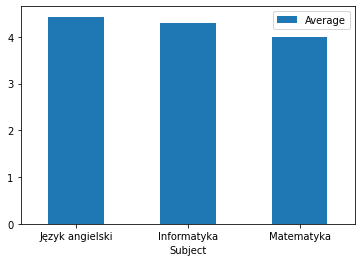

In [56]:
def calculateAverageForAllSubjects():

  #Opening workbook
  wb = openpyxl.load_workbook('oceny-grupa1.xlsx')

  #Main dictionary in the function
  averages = {}

  #Iterating over sheets in the workbook
  for sheet in wb.worksheets:
    sheet = wb[sheet.title]

    #Grades list for each subject
    average = []

    #Iterating over max rows and appending grades to average list
    for i in range(1, sheet.max_row + 1):
        average.append(sheet.cell(row=i, column=2).value)
    
    #Adding subject as a key and average as a value
    averages[sheet.title] = round(sum(average) / sheet.max_row, 2)

  #Sorting dictionary
  averages = sorted([(value,key) for (key,value) in averages.items()], reverse=True)


  #Making bar chart with pandas - we need separated subjects and averages from original averages list
  subjectsSeparate = []
  averagesSeparate = []
  for x in range(len(averages)):
    averagesSeparate.append(averages[x][0])
    subjectsSeparate.append(averages[x][1])


  df = pd.DataFrame({'Subject':subjectsSeparate, 'Average':averagesSeparate})
  ax = df.plot.bar(x='Subject', y='Average', rot=0)

calculateAverageForAllSubjects()

<h1>Generate student ranking for subject</h1>

In [57]:
def generateStudentRankingForSubject(subject):

  #Opening workbook and sheet with the subject according to entered parameter
  wb = openpyxl.load_workbook('oceny-grupa1.xlsx')
  sheet = wb[subject]

  #Main dictionary for the function
  ranking = {}

  #Iterating over max number of rows
  for i in range(1, sheet.max_row + 1):

    #If grade is already in ranking dictionary, append a student to a list, which is a value for the grade (many students can have the same grade)
    if sheet.cell(row=i, column=2).value in ranking:
      ranking[sheet.cell(row=i, column=2).value].append(sheet.cell(row=i, column=1).value)
    
    #If there is no such grade in dictionary, make a new key with list as a value
    else:
      ranking[sheet.cell(row=i, column=2).value] = [sheet.cell(row=i, column=1).value]

  #Sort dictionary from highest to lowest value
  ranking = dict(sorted(ranking.items(), reverse=True))

  #Counter as a position in the ranking
  counter = 1

  #Iterating over lists of students in ranking dictionary 
  for students in ranking.values():
    position = ''

    #Iterating over students in a list
    for student in students:
      position += student + ', '

    #Removing whitespace and comma from the end of each position
    print(str(counter) + '. ' + position[:-2])
    counter += 1

#Input for entering the name of a subject
subject = input('Enter a name of the subject: ')
generateStudentRankingForSubject(subject)

Enter a name of the subject: Matematyka
1. Jan Kowalski, Albert Nowakowski
2. Izabela Nowak, Franciszek Terczyński, Aneta Łakon
3. Barbara Piekarska, Piotr Mącisz


<h1>Generate student ranking for all subjects</h1>

In [58]:
def generateStudentRankingForAllSubjects():
  #Opening workbook
  wb = openpyxl.load_workbook('oceny-grupa1.xlsx')

  #Dictionary with grades from every subject for each student 
  grades = {}

  #Iterating over sheets in workbook sheets
  for sheet in wb.worksheets:
    sheet = wb[sheet.title]

    #Iterating over max number of rows 
    for i in range(1, sheet.max_row + 1):

      #If student is already in grades dictionary, append a grade to a list
      if sheet.cell(row=i, column=1).value in grades:
        grades[sheet.cell(row=i, column=1).value].append(sheet.cell(row=i, column=2).value)
      
      #If there is no student in dictionary, make a new key with grade as a value
      else:
        grades[sheet.cell(row=i, column=1).value] = [sheet.cell(row=i, column=2).value]
  
  #Iterating over students in grades dictionary and counting average
  for student in grades.keys():
    grades[student] = round(sum(grades[student])/len(wb.worksheets), 2)

  #Ranking dictionary
  ranking = {}

  #Iterate over students and their averages
  for student, average in grades.items():

    #Appending students to grades
    if average in ranking:
      ranking[average].append(student)

    #Making an average as a key and append students (many students can have the same grade)
    else:
      ranking[average] = [student]

  #Sorting ranking dictionary 
  ranking = dict(sorted(ranking.items(), reverse=True))

  #Counter as a position in the ranking
  counter = 1

  #Iterating over students in each key's value
  for students in ranking.values():
    position = ''
    for student in students:
      position += student + ', '
    
    #Printing position
    print(str(counter) + '. ' + position[:-2])
    counter += 1


generateStudentRankingForAllSubjects()

1. Franciszek Terczyński
2. Aneta Łakon
3. Jan Kowalski, Barbara Piekarska, Albert Nowakowski
4. Izabela Nowak
5. Piotr Mącisz
